### Anomaly Detection
* What are Outliers ?
* Isolation Forest
* Local Outlier Factor
* DBSCAN

### Outliers
* New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
* Data belonging to general trend are known as inliners.
* Learning models are impacted by presence of outliers.
* Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
* Data which were detected outliers can be deleted from complete dataset.
* Outliers can also be marked before using them in learning methods

### Isolation Forest
* Based on RandomForest
* Useful in detecting outliers in high dimension datasets.
* This algorithm randomly selects a feature & splits further.
* Random partitioning produces shorter part for anomolies.
* When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [10]:
import numpy as np
import pylab as plt

In [3]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
data = np.r_[X_train,X_test,X_outliers]

In [6]:
iso = IsolationForest(behaviour='new', contamination='auto')

In [7]:
iso.fit(data)

/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


IsolationForest(behaviour='new')

In [8]:
pred = iso.predict(data)

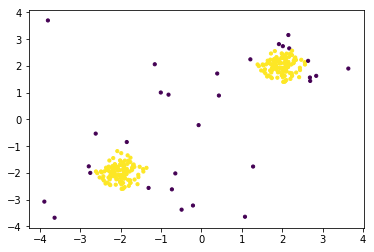

In [11]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### Local Outlier Factor
* Based on nearest neighbours
* Suited for moderately high dimension datasets
* LOF computes a score reflecting degree of abnormility of a data.
* LOF Calculation
  - Local density is calculated from k-nearest neighbors.
  - LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
  - An abnormal data is expected to have smaller local density.
* LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [12]:
from sklearn.neighbors import LocalOutlierFactor

In [13]:
lof = LocalOutlierFactor(n_neighbors=25,contamination=.1)

In [14]:
pred = lof.fit_predict(data)

In [15]:
s = np.abs(lof.negative_outlier_factor_)

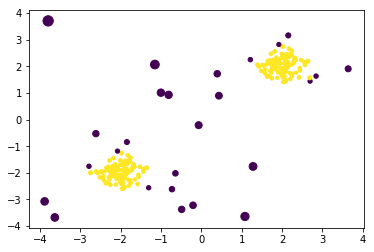

In [16]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

### Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps=.3)

In [19]:
dbscan.fit(data)

DBSCAN(eps=0.3)

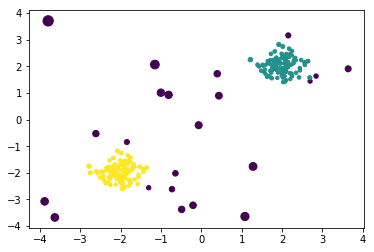

In [20]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=dbscan.labels_)